# Clustering Countries:

In [15]:
#import pandas

import pandas as pd

In [16]:
#import datasets

#Note: used same dataset as correlation graph

emigration_df = pd.read_csv('emigrationData.csv')


In [17]:
# View DataSet

pd.set_option('display.max_columns', None)

emigration_df

,Unnamed: 0,iso3,Birth Rate,Infant mortality,Physicians per thousand,Life expectancy,OOP health expenditure,GDP,Unemployment rate,Minimum wage,Primary education enrollment,Tertiary education enrollment,Emigrants_total,Immigrants_total,emig_rate,immig_rate
0,0,AFG,32.49,47.9,0.28,64.5,78.4,1.910135e+10,11.12,0.43,104.0,9.7,4683917,124681,0.171375,0.005505
1,1,ALB,11.78,7.8,1.20,78.5,56.9,1.527808e+10,12.33,1.12,107.0,55.0,998089,40633,0.298221,0.017300
2,2,DZA,24.28,20.1,1.72,76.7,28.1,1.699882e+11,11.70,0.95,109.9,51.4,1706780,218129,0.053239,0.007187
3,3,AND,7.20,2.7,3.33,NaN,36.4,3.154058e+09,NaN,6.63,106.4,NaN,8726,41084,NaN,NaN
4,4,AGO,40.73,51.6,0.21,60.8,33.4,9.463542e+10,6.89,0.71,113.5,9.3,533102,628024,0.029370,0.035647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,193,VEN,17.88,21.4,1.92,72.1,45.8,4.823593e+11,8.80,0.01,97.2,79.3,4514649,1095761,0.179166,0.052977
194,194,VNM,16.75,16.5,0.82,75.3,43.5,2.619212e+11,2.01,0.73,110.6,28.5,3034054,63061,0.039000,0.000843
195,195,YEM,30.45,42.9,0.31,66.1,81.0,2.691440e+10,12.91,NaN,93.6,10.2,1237110,317028,0.063503,0.017377
196,196,ZMB,36.19,40.4,1.19,63.5,27.5,2.306472e+10,11.43,0.24,98.7,4.1,167069,167542,0.015974,0.016279


In [18]:
# Make new clustering set with our specific clustering variables (We exclude emigration Numbers and Country Name)

clusterData = emigration_df.copy()

# Use only our variables of interest from correlation graoh:
# - Drop 'tschool_enrollment', 'life_expectancy', 'physicians_per1000', because very low correlation

clusterData = clusterData[['GDP', 'Birth Rate', 'Infant mortality', 'Minimum wage', 'OOP health expenditure', 'Primary education enrollment', 'Unemployment rate']]#, 'Emigrants_total']]


clusterData

,GDP,Birth Rate,Infant mortality,Minimum wage,OOP health expenditure,Primary education enrollment,Unemployment rate
0,1.910135e+10,32.49,47.9,0.43,78.4,104.0,11.12
1,1.527808e+10,11.78,7.8,1.12,56.9,107.0,12.33
2,1.699882e+11,24.28,20.1,0.95,28.1,109.9,11.70
3,3.154058e+09,7.20,2.7,6.63,36.4,106.4,NaN
4,9.463542e+10,40.73,51.6,0.71,33.4,113.5,6.89
...,...,...,...,...,...,...,...
193,4.823593e+11,17.88,21.4,0.01,45.8,97.2,8.80
194,2.619212e+11,16.75,16.5,0.73,43.5,110.6,2.01
195,2.691440e+10,30.45,42.9,NaN,81.0,93.6,12.91
196,2.306472e+10,36.19,40.4,0.24,27.5,98.7,11.43


In [19]:
# Deal with missing values using KNN imputer algorithm

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

columns = clusterData.columns

clusterData = imputer.fit_transform(clusterData)

clusterData = pd.DataFrame(clusterData, columns= columns)

clusterData

,GDP,Birth Rate,Infant mortality,Minimum wage,OOP health expenditure,Primary education enrollment,Unemployment rate
0,1.910135e+10,32.49,47.9,0.430,78.4,104.0,11.12
1,1.527808e+10,11.78,7.8,1.120,56.9,107.0,12.33
2,1.699882e+11,24.28,20.1,0.950,28.1,109.9,11.70
3,3.154058e+09,7.20,2.7,6.630,36.4,106.4,2.12
4,9.463542e+10,40.73,51.6,0.710,33.4,113.5,6.89
...,...,...,...,...,...,...,...
193,4.823593e+11,17.88,21.4,0.010,45.8,97.2,8.80
194,2.619212e+11,16.75,16.5,0.730,43.5,110.6,2.01
195,2.691440e+10,30.45,42.9,0.755,81.0,93.6,12.91
196,2.306472e+10,36.19,40.4,0.240,27.5,98.7,11.43


In [20]:
# standard scaler to adjust weights in clustering

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
clusterData_scaled = ss.fit_transform(clusterData)

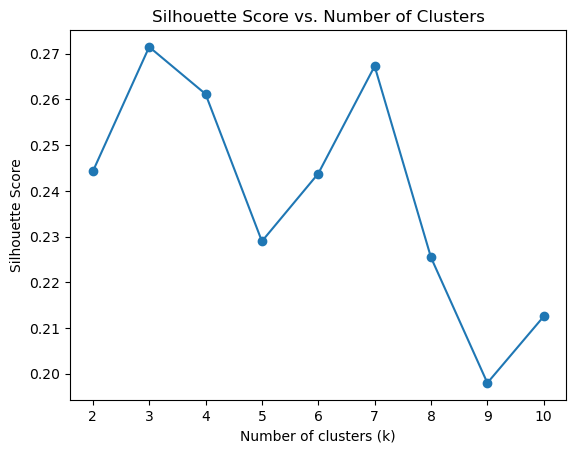

In [21]:
# use silhouette score to determine optimal number of clusters

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
s_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(clusterData_scaled)
    inertia.append(kmeans.inertia_)
    s_scores.append(silhouette_score(clusterData_scaled, kmeans.labels_))

# Plot the scores
plt.plot(range(2, 11), s_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


#looks like  3 clusters is most optimal

In [22]:
#Apply Kmeans Clustering

from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

# kmeans

kmeans = KMeans(n_clusters= 3, random_state = 42).fit(clusterData_scaled)

#add clusters to dataset

emigration_df['cluster'] = kmeans.labels_
clusterData['cluster'] = kmeans.labels_

kmeans.labels_

array([0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0],
      dtype=int32)

In [23]:
# Apply PCA for Graphing

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca = pca.fit_transform(clusterData_scaled)

pca = pd.DataFrame(pca)

pca


,0,1
0,2.621658,-0.649070
1,-0.228598,-0.483040
2,0.271111,0.314916
3,-1.978883,0.208291
4,2.184563,0.982224
...,...,...
193,0.497241,-0.627997
194,-0.008782,0.648385
195,2.459842,-1.463401
196,1.739262,-0.119237


<AxesSubplot:xlabel='0', ylabel='1'>

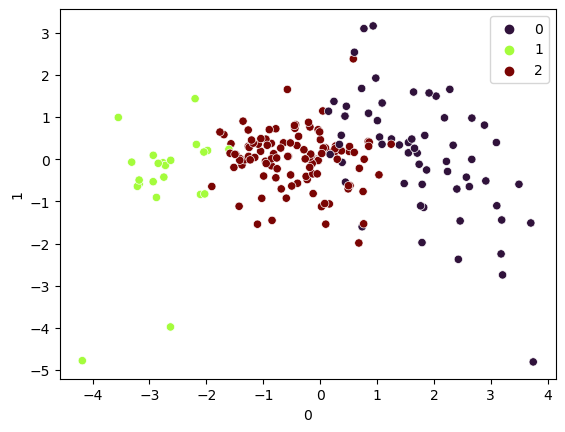

In [24]:
# Graph Clusters

import seaborn as sns

sns.scatterplot(data = pca, x = pca[0], y =pca[1], hue = kmeans.labels_
               , palette= 'turbo')



In [25]:
#VIEW CLUSTER GROUP DETAILS

print("Cluster 1")

print(clusterData[clusterData['cluster'] == 0].mean())

print("Cluster 2")

print(clusterData[clusterData['cluster'] == 1].mean())

print("Cluster 3")

print(clusterData[clusterData['cluster'] == 2].mean())

Cluster 1
GDP                             3.321850e+10
Birth Rate                      3.269734e+01
Infant mortality                4.485469e+01
Minimum wage                    7.563281e-01
OOP health expenditure          3.650937e+01
Primary education enrollment    1.019570e+02
Unemployment rate               7.096016e+00
cluster                         0.000000e+00
dtype: float64
Cluster 2
GDP                             2.880607e+12
Birth Rate                      1.047739e+01
Infant mortality                3.295652e+00
Minimum wage                    8.723043e+00
OOP health expenditure          1.693696e+01
Primary education enrollment    1.037913e+02
Unemployment rate               5.494783e+00
cluster                         1.000000e+00
dtype: float64
Cluster 3
GDP                             2.320465e+11
Birth Rate                      1.582062e+01
Infant mortality                1.244884e+01
Minimum wage                    1.613359e+00
OOP health expenditure          3.316915

In [26]:
#Get total emigration numbers per cluster

totals = emigration_df.groupby('cluster')['emig_rate'].mean()

totals

cluster
0    0.068825
1    0.048386
2    0.136652
Name: emig_rate, dtype: float64

In [27]:
# View Countries in each cluster

clusterSet = emigration_df[emigration_df['cluster'] == 1]

clusterSet['iso3']

# appears that superpower countries have lowest emigration rates

3      AND
8      AUS
16     BEL
32     CAN
36     CHN
45     NaN
46     NaN
72     FRA
76     DEU
92     ISR
95     JPN
108    LIE
110    LUX
123    MCO
130    NLD
131    NZL
136    NOR
162    SVN
166    KOR
168    ESP
172    SWE
188    GBR
189    USA
Name: iso3, dtype: object

In [28]:
# Interpretations: It looks like countries with high socioeconomic status have lower emigration rates?
